In [289]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from pathlib import Path
import os
from PIL import Image
from tensorflow.keras import layers

In [290]:
images = "ImageClassificationProject/train/train/Plum/Plum_0.jpg"

In [291]:
img = mpimg.imread(images)

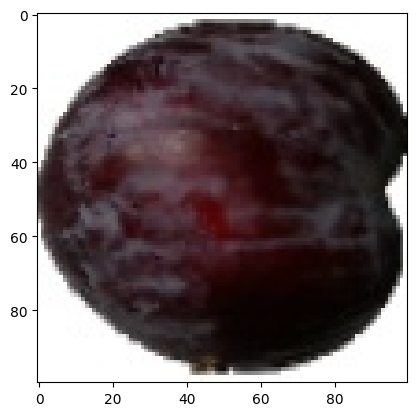

In [292]:
plt.imshow(img)

In [293]:
trainingDataset = "ImageClassificationProject/train/train"
testDataset = "ImageClassificationProject/test/test"
len(trainingDataset)

38

In [294]:
indexes = []
for i in range(len(trainingDataset)):
    indexes.append(i)
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [295]:
typesOfImages = []
trainingDataset = Path("ImageClassificationProject/train/train")
testDataset = Path("ImageClassificationProject/test/test")

for f in trainingDataset.iterdir():
    if f.is_dir():
        typesOfImages.append(f.name)
print(typesOfImages)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [296]:
def imageDetails(image):
    y = Image.open(image)
    print("image format:", y.format)
    print("image size:", y.size)
    print("image mode:", y.mode)

In [297]:
classes = typesOfImages

In [298]:
def getFruitImage():
    userWantsThisFruit = int(input("What fruit do you want?"))
    fruitType = typesOfImages[userWantsThisFruit] ## gets a fruit type, for eg, BlueBerry

    fruitType = os.path.join(trainingDataset, fruitType) ## gives you this: 'ImageClassificationProject\\train\\train\\Limes'
    
    fruitImage = os.listdir(fruitType) ## gives my everything with a sub folder for a fruit 

    useruserWantsThisFruitImage = int(input("Enter a number for what image you want:"))
    combined = fruitType + "\\" + fruitImage[useruserWantsThisFruitImage] ## gives you this: 'ImageClassificationProject\\train\\train\\Limes\\Limes_103.jpg'

    fruitContents = combined

    imageDetails(fruitContents)
    
    img = mpimg.imread(fruitContents)
    plt.figure(figsize=(15, 2))
    plt.imshow(img)
    plt.xlabel(classes[userWantsThisFruit])

{0: 'Apple Braeburn', 1: 'Apple Granny Smith', 2: 'Apricot', 3: 'Avocado', 4: 'Banana', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe', 8: 'Cherry', 9: 'Clementine', 10: 'Corn', 11: 'Cucumber Ripe', 12: 'Grape Blue', 13: 'Kiwi', 14: 'Lemon', 15: 'Limes', 16: 'Mango', 17: 'Onion White', 18: 'Orange', 19: 'Papaya', 20: 'Passion Fruit', 21: 'Peach', 22: 'Pear', 23: 'Pepper Green', 24: 'Pepper Red', 25: 'Pineapple', 26: 'Plum', 27: 'Pomegranate', 28: 'Potato Red', 29: 'Raspberry', 30: 'Strawberry', 31: 'Tomato', 32: 'Watermelon'}
image format: JPEG
image size: (100, 100)
image mode: RGB


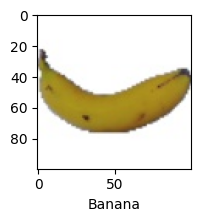

In [299]:
mapping = dict(zip(indexes, typesOfImages))
print(mapping)

getFruitImage()

In [300]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    trainingDataset,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(25, 25),
    batch_size=32
)

Found 16854 files belonging to 33 classes.
Using 13484 files for training.


In [301]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    trainingDataset,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(25, 25),
    batch_size=32
)

Found 16854 files belonging to 33 classes.
Using 3370 files for validation.


In [302]:
classNames = train_dataset.class_names

In [303]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(classNames), activation='softmax')
])

In [304]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using ImageDataGenerator
              metrics=['accuracy'])

In [305]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [306]:
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7337 - loss: 1.5886 - val_accuracy: 0.9982 - val_loss: 0.0074
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0610 - val_accuracy: 0.9958 - val_loss: 0.0179
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 0.9006 - val_loss: 0.4852
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9660 - loss: 0.1265 - val_accuracy: 0.9911 - val_loss: 0.0257
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9754 - loss: 0.0954 - val_accuracy: 0.9754 - val_loss: 0.1397
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9987 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 4.2310e-05
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 2.4823e-05 - val_accuracy: 1.0000 - val_loss: 2.5833e-05
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 1.4393e-05 -

In [307]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {accuracy:.2f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.4179e-05
Validation Accuracy: 1.00


In [308]:
# Get the true labels and predicted labels
y_true = []
y_pred = []

for images, labels in val_dataset:  # Iterate through validation dataset
    preds = model.predict(images)  # Get model predictions
    y_true.extend(labels.numpy())  # Append true labels
    y_pred.extend(np.argmax(preds, axis=1))  # Convert predictions to class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [309]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

In [310]:
cm

array([[104,   0,   0, ...,   0,   0,   0],
       [  0,  92,   0, ...,   0,   0,   0],
       [  0,   0,  95, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0, 149,   0],
       [  0,   0,   0, ...,   0,   0,  99]])

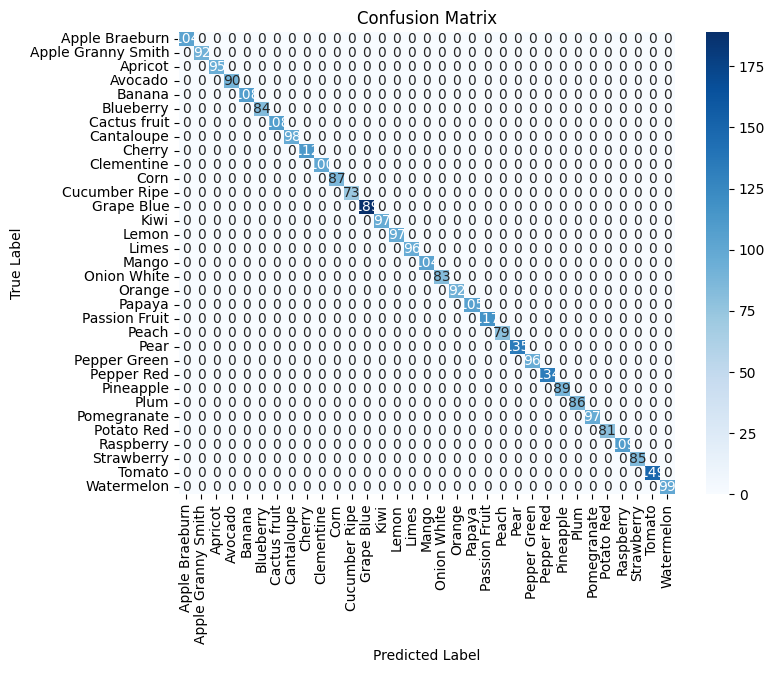

In [311]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [312]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_true, y_pred, target_names=classNames))

                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00       104
Apple Granny Smith       1.00      1.00      1.00        92
           Apricot       1.00      1.00      1.00        95
           Avocado       1.00      1.00      1.00        90
            Banana       1.00      1.00      1.00       108
         Blueberry       1.00      1.00      1.00        84
      Cactus fruit       1.00      1.00      1.00       108
        Cantaloupe       1.00      1.00      1.00        98
            Cherry       1.00      1.00      1.00       112
        Clementine       1.00      1.00      1.00       100
              Corn       1.00      1.00      1.00        87
     Cucumber Ripe       1.00      1.00      1.00        73
        Grape Blue       1.00      1.00      1.00       189
              Kiwi       1.00      1.00      1.00        97
             Lemon       1.00      1.00      1.00        97
             Limes       1.00      1.00

In [313]:
import numpy as np
from tensorflow.keras.preprocessing import image

def cnnPredictFruit(index):
    dir = os.path.join(trainingDataset, typesOfImages[index])
    fruitImage = os.listdir(dir) ## gives my everything with a sub folder for a fruit 
    combined = dir + "\\" + fruitImage[index]

    img_path = combined
    img = image.load_img(img_path, target_size=(25, 25))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = classNames[np.argmax(predictions)]
    print(f"Predicted class: {predicted_class}")

    img = mpimg.imread(combined)
    plt.figure(figsize=(15, 2))
    plt.imshow(img)
    plt.xlabel(classes[index])
    plt.title("Cnn model predicted this image to be")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: Blueberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Apple Granny Smith
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Orange


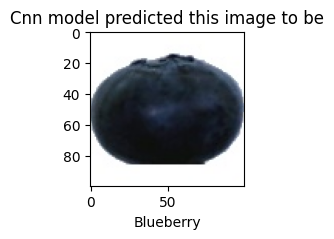

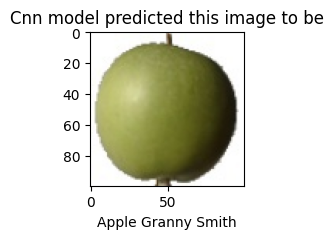

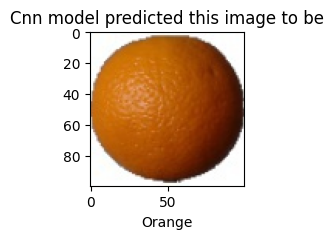

In [314]:
cnnPredictFruit(5)
cnnPredictFruit(1)
cnnPredictFruit(18)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Apple Braeburn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Apple Granny Smith
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Apricot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Avocado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Banana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Blueberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Cactus fruit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Cantaloupe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Cherry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: Clementine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Corn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Cucumber Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: Grape Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: Kiwi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: Lemon
1/1 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\Kylek\AppData\Local\Temp\ipykernel_26212\2965543942.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: Pepper Green
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Pepper Red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Pineapple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Plum
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: Pomegranate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Potato Red
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Raspberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: Strawberry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: Watermelon


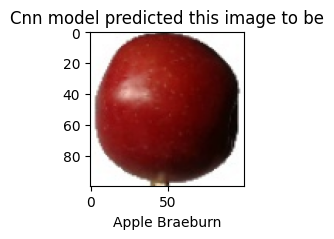

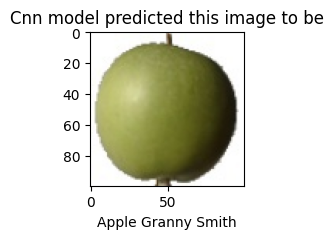

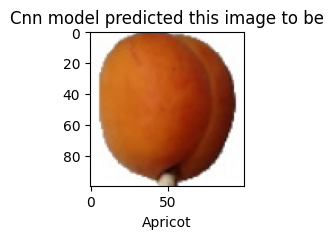

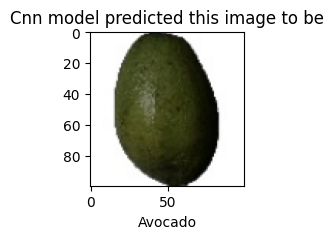

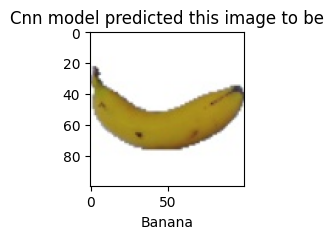

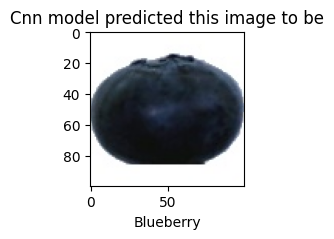

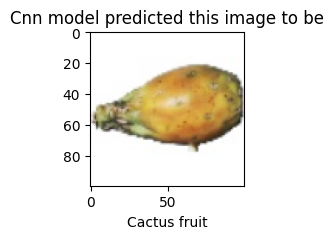

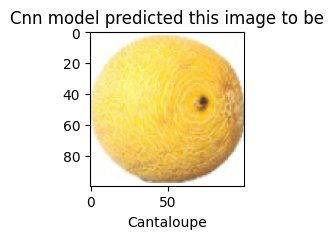

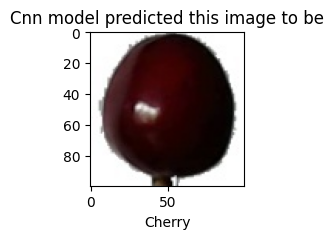

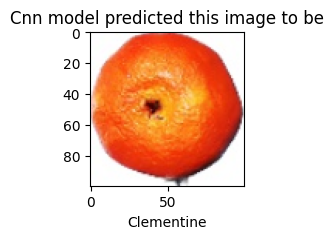

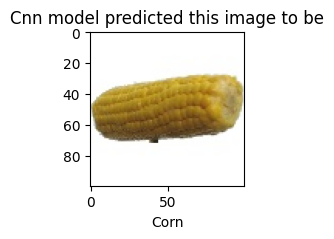

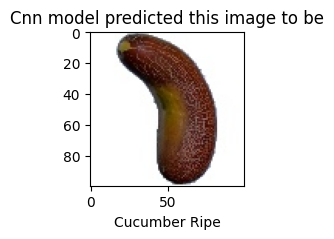

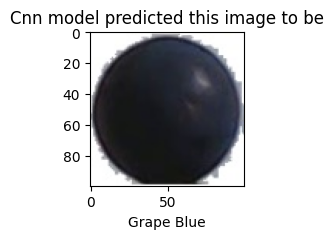

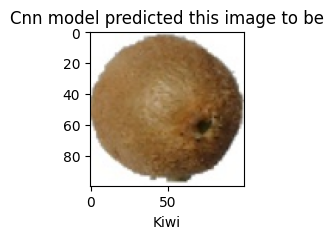

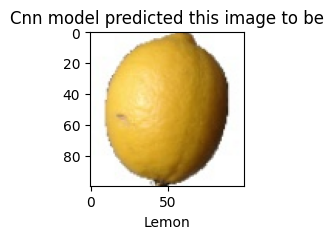

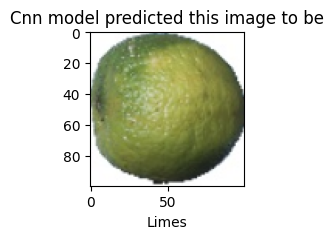

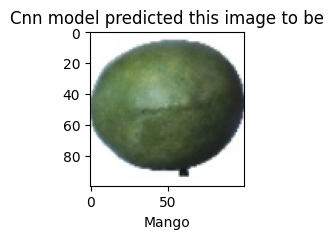

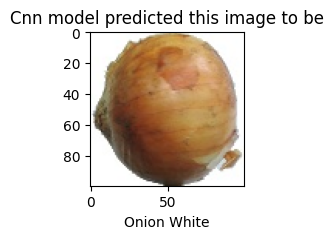

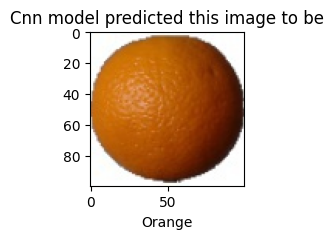

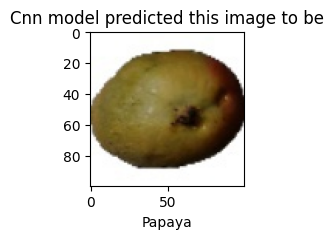

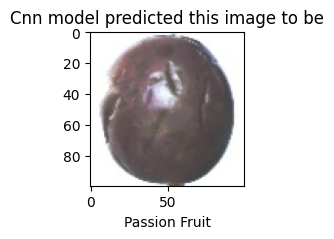

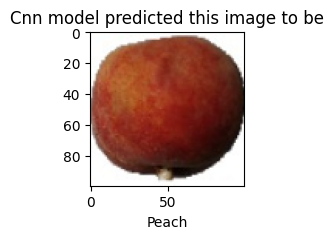

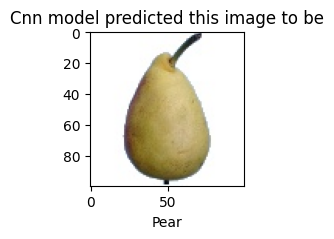

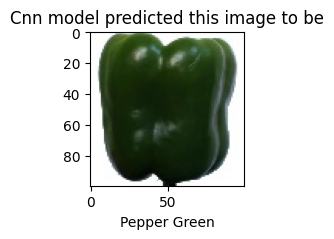

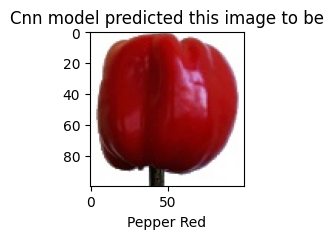

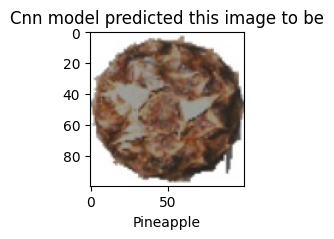

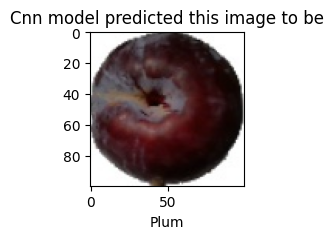

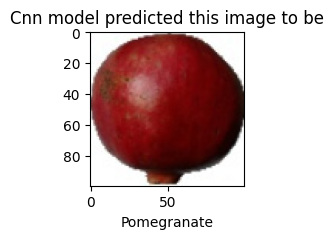

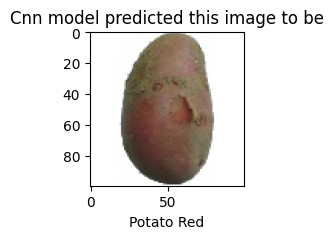

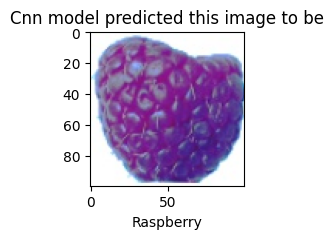

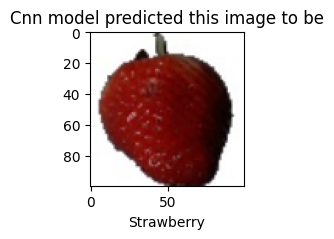

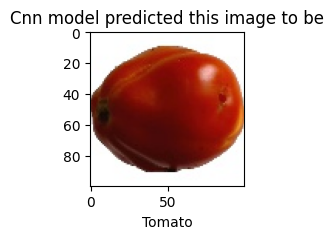

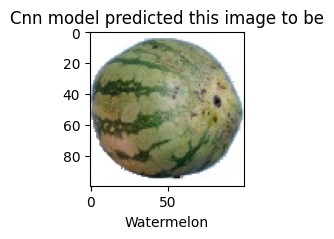

In [326]:
for i in range(len(typesOfImages)):
    cnnPredictFruit(i)